In [1]:
import sys; sys.path.insert(0, '..')
from database.dataset import INBreast_Dataset
import matplotlib.pyplot as plt
from metrics.metrics import get_tp_fp_fn, quick_circle_comparison
from general_utils.utils import get_center_bboxes
from tqdm import tqdm
import numpy as np
import h5py
import math

In [2]:
db = INBreast_Dataset(
        return_lesions_mask=True,
        level='image',
        extract_patches=False,
        normalize=None,
        n_jobs=-1,
        partitions=['train']
    )

In [16]:
for idx in range(2):
    path = '/home/jseia/Desktop/ml-dl/data/hdog_detections/det_ms-1.18_sr-1.05_Ms-3.1_m-marasinou_dth-0.006_hdiv-200.0_hth-5.hdf5'
    with h5py.File(path, 'r') as f:
        detections = f[f'{db.df.at[idx, "img_id"]}/hessian_detections'][:]
    detections[:, 2] = detections[:, 2]*math.sqrt(2)
    case = db[idx]
    tp, fp, fn, gt_predicted, close_fp = get_tp_fp_fn(
        case['lesion_bboxes'], case['radiuses'], detections, 7, 0.2
    )
    print(len(tp), len(fp), len(fn), len(gt_predicted), len(close_fp))

179 554795 0 37 211
265 397715 0 59 338


In [6]:
import cv2
import math

def create_binary_mask_from_blobs(shape: tuple, blobs_x_y_sigma: list):
    img_binary_blobs = np.zeros(shape)
    for blob in blobs_x_y_sigma:
        img_binary_blobs = cv2.circle(
            img_binary_blobs, (blob[0], blob[1]),
            int(math.sqrt(2) * blob[2]), 255, -1
        )
    return img_binary_blobs

def create_binary_mask_from_point(shape: tuple, blobs_x_y_sigma: list):
    img_binary_blobs = np.zeros(shape)
    for blob in blobs_x_y_sigma:
        img_binary_blobs[blob[1], blob[0]] = 2551
    return img_binary_blobs

In [7]:
def plot_blobs(image,image_blobs, tp, color):
    f, ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(image,cmap='gray')
    for blob in tqdm(image_blobs):
        x, y, r = blob
        c = plt.Circle((x, y), r+8, color='red', linewidth=1, fill=False)
        ax.add_patch(c)
    for blob in tqdm(tp):
        x, y, r = blob
        c = plt.Circle((x, y), r+2, color='yellow', linewidth=1, fill=False)
        ax.add_patch(c)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

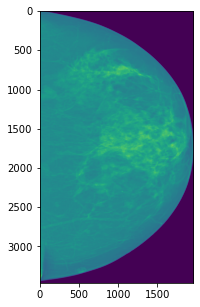

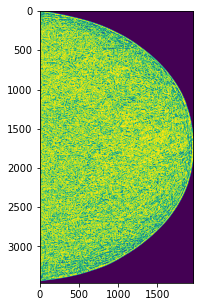

In [11]:
plt.figure(figsize=(15,5))
plt.imshow(case['img'])
plt.figure(figsize=(15,5))
plt.imshow(create_binary_mask_from_blobs(case['img'].shape, fp.astype(int)))

In [12]:

lesion_bboxes = case['lesion_bboxes']
radiouses = case['radiuses']
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(lesion_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

shape = case['img'].shape
mask_fp = create_binary_mask_from_blobs(shape, fp.astype(int))
mask_fn = create_binary_mask_from_blobs(shape, fn.astype(int))
mask_tp = create_binary_mask_from_blobs(shape, tp.astype(int))
mask_gt = create_binary_mask_from_blobs(shape, gt_circles.astype(int))

mask_fp_c = create_binary_mask_from_point(shape, fp.astype(int))
mask_fn_c = create_binary_mask_from_point(shape, fn.astype(int))
mask_tp_c = create_binary_mask_from_point(shape, tp.astype(int))
mask_gt_c = create_binary_mask_from_point(shape, gt_circles.astype(int))

def crop(img, point):
    return img[point[1] - 10 : point[1] + 10,  point[0] - 10 : point[0] + 10]

crop_tp = crop(mask_tp, fn.astype(int)[0])
crop_fp = crop(mask_fp, fn.astype(int)[0])
crop_gt = crop(mask_gt, fn.astype(int)[0])
crop_fn = crop(mask_fn, fn.astype(int)[0])

crop_tp_c = crop(mask_tp_c, fn.astype(int)[0])
crop_fp_c = crop(mask_fp_c, fn.astype(int)[0])
crop_gt_c = crop(mask_gt_c, fn.astype(int)[0])
crop_fn_c = crop(mask_fn_c, fn.astype(int)[0])

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(crop_fn, cmap='gray')
plt.imshow(crop_fp, cmap='gray', alpha=0.1)
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,2)
plt.imshow(crop_fp, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(crop_gt, cmap='gray')
plt.imshow(crop_tp, cmap='gray', alpha=0.1)
plt.imshow(crop_tp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,4)
plt.imshow(crop_tp, cmap='gray')
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [16]:
type(detections)

numpy.ndarray

In [17]:
TP, FP, FN = quick_circle_comparison(
    detections, case['lesion_mask']
)

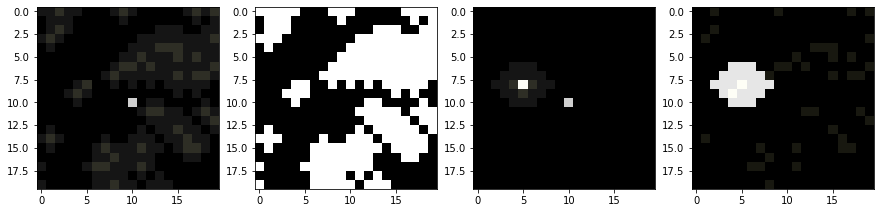

In [14]:
lesion_bboxes = case['lesion_bboxes']
radiouses = case['radiuses']
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(lesion_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

shape = case['img'].shape
mask_fp = create_binary_mask_from_blobs(shape, fp.astype(int))
mask_fn = create_binary_mask_from_blobs(shape, fn.astype(int))
mask_tp = create_binary_mask_from_blobs(shape, tp.astype(int))
mask_gt = create_binary_mask_from_blobs(shape, gt_circles.astype(int))

mask_fp_c = create_binary_mask_from_point(shape, fp.astype(int))
mask_fn_c = create_binary_mask_from_point(shape, fn.astype(int))
mask_tp_c = create_binary_mask_from_point(shape, tp.astype(int))
mask_gt_c = create_binary_mask_from_point(shape, gt_circles.astype(int))

def crop(img, point):
    return img[point[1] - 10 : point[1] + 10,  point[0] - 10 : point[0] + 10]

crop_tp = crop(mask_tp, fn.astype(int)[0])
crop_fp = crop(mask_fp, fn.astype(int)[0])
crop_gt = crop(mask_gt, fn.astype(int)[0])
crop_fn = crop(mask_fn, fn.astype(int)[0])

crop_tp_c = crop(mask_tp_c, fn.astype(int)[0])
crop_fp_c = crop(mask_fp_c, fn.astype(int)[0])
crop_gt_c = crop(mask_gt_c, fn.astype(int)[0])
crop_fn_c = crop(mask_fn_c, fn.astype(int)[0])

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.imshow(crop_fn, cmap='gray')
plt.imshow(crop_fp, cmap='gray', alpha=0.1)
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,2)
plt.imshow(crop_fp, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(crop_gt, cmap='gray')
plt.imshow(crop_tp, cmap='gray', alpha=0.1)
plt.imshow(crop_tp_c, cmap='inferno', alpha=0.1)

plt.subplot(1,4,4)
plt.imshow(crop_tp, cmap='gray')
plt.imshow(crop_fp_c, cmap='inferno', alpha=0.1)

plt.show()